* Cory Clayton (acc2ds@virginia.edu)
- DS5001
- 6 May 2021


# Sentiment Analysis using salex and Vader

## set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
data_in = 'data_in/'
data_out = 'data_out/'
data_prefix = 'movie'

## data loading

In [3]:
TOKENS=pd.read_csv(f'{data_in}{data_prefix}-TOKENS.csv')
VOCAB=pd.read_csv(f'{data_in}{data_prefix}-VOCAB.csv')

In [4]:
LIB=pd.read_csv(f'{data_in}{data_prefix}-LIB.csv')
LIB=LIB.set_index("movie_id")

## import lexicon

In [5]:
salex_csv = f'lexicons/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [6]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [7]:
salex['polarity'] = salex.positive - salex.negative

In [8]:
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [9]:
OHCO=["movie_id","Action_number","Dialogue_num","sent_num"]

In [10]:
TOKENS = TOKENS.set_index(OHCO).sort_index()
TOKENS = TOKENS.join(LIB)
TOKENS = TOKENS.reset_index().set_index(['name']+OHCO)

In [11]:
TOKENS

token_num  \
name                         movie_id Action_number Dialogue_num sent_num              
Rogue One: A Star Wars Story m1       1.0           0            0                 0   
                                                    1            0                 0   
                                                                 0                 1   
                                                                 1                 0   
                                                                 1                 1   
...                                                                              ...   
Avengers: Infinity War       m9       277.0         1            0                 0   
                                      278.0         0            0                 0   
                                      279.0         0            0                 0   
                                                                 0                 1   
                                                                 1                 0   

                                                                                   pos_tuple  \
name                         movie_id Action_number Dialogue_num sent_num                      
Rogue One: A Star Wars Story m1       1.0           0            0            ('Mama', 'NN')   
                                                    1            0             ('We', 'PRP')   
                                                                 0           ('know', 'VBP')   
                                                                 1           ('Jyn,', 'NNP')   
                                                                 1          ('gather', 'CC')   
...                                                                                      ...   
Avengers: Infinity War       m9       277.0         1            0            ('Nick', 'NN')   
                                      278.0         0            0            ('Hill', 'NN')   
                                      279.0         0            0            ('Oh,', 'NNP')   
                                                                 0              ('no', 'DT')   
                                                                 1         ('Motherf', 'NN')   

                                                                           pos  \
name                         movie_id Action_number Dialogue_num sent_num        
Rogue One: A Star Wars Story m1       1.0           0            0          NN   
                                                    1            0         PRP   
                                                                 0         VBP   
                                                                 1         NNP   
                                                                 1          CC   
...                                                                        ...   
Avengers: Infinity War       m9       277.0         1            0          NN   
                                      278.0         0            0          NN   
                                      279.0         0            0         NNP   
                                                                 0          DT   
                                                                 1          NN   

                                                                          token_str  \
name                         movie_id Action_number Dialogue_num sent_num             
Rogue One: A Star Wars Story m1       1.0           0            0             Mama   
                                                    1            0               We   
                                                                 0             know   
                                                                 1             Jyn,   
                                                                 1           gather   
...  

## append lexicon to token table

In [12]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [13]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [14]:
TOKENS.reset_index().name.unique()

array(['Rogue One: A Star Wars Story', 'Avengers: Endgame',
       'Captain Marvel', 'Beauty and the Beast', 'Inside Out',
       'Monsters University', 'Monsters Inc.', 'Moana', 'Zootopia',
       'Mulan', 'Soul', 'Star Wars: Episode III - Revenge of the Sith',
       'Frozen', 'Frozen II', 'Tangled', 'Cars', 'Finding Nemo',
       'Star Wars: The Rise of Skywalker',
       'Captain America: The First Avenger',
       'Captain America: The Winter Soldier',
       'Captain America: Civil War', 'The Avengers',
       'Avengers: Age of Ultron', 'Avengers: Infinity War'], dtype=object)

In [15]:
import seaborn as sns
sns.set()

## get mean sentiment for wach movie

In [16]:
EMO_MOVIES = TOKENS.groupby(['name','movie_id'])[emo_cols].mean()

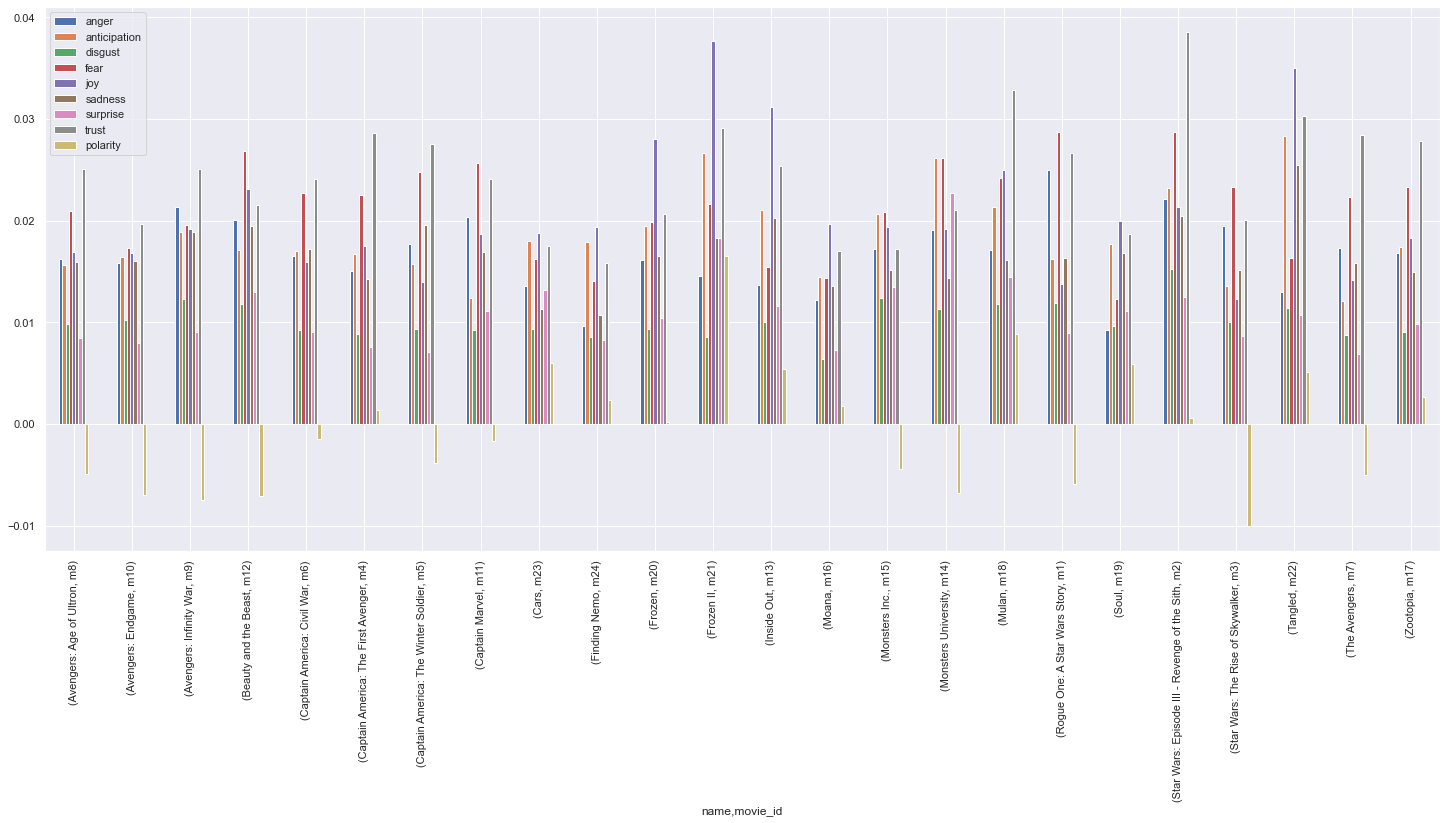

In [17]:
EMO_MOVIES.plot.bar(figsize=(25,10))

## Compare movies by mean sentiment

### Disney Princess movies

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


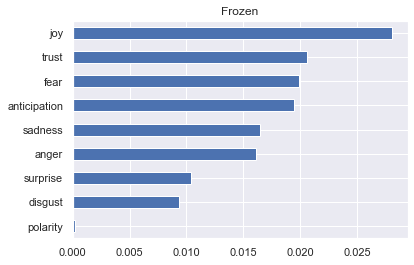

In [18]:
F=TOKENS.loc[("Frozen","m20")]
F[emo_cols].mean().sort_values().plot.barh(title="Frozen")

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


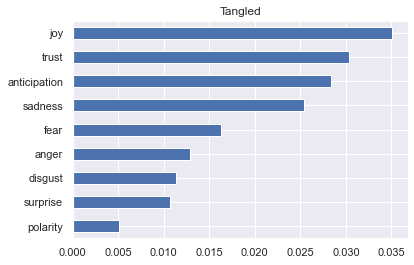

In [19]:
F=TOKENS.loc[("Tangled","m22")]
F[emo_cols].mean().sort_values().plot.barh(title="Tangled")

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


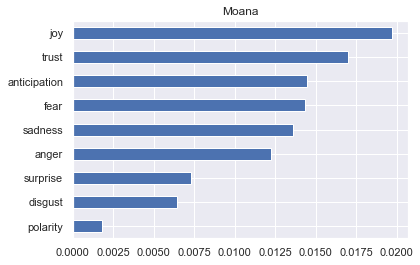

In [20]:
F=TOKENS.loc[("Moana","m16")]
F[emo_cols].mean().sort_values().plot.barh(title="Moana")

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


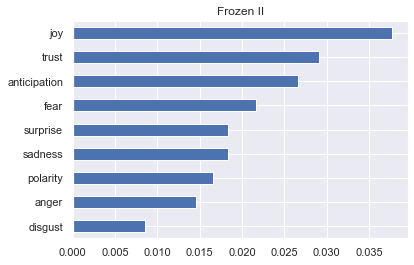

In [21]:
F2=TOKENS.loc[("Frozen II","m21")]
F2[emo_cols].mean().sort_values().plot.barh(title="Frozen II")

### Pixar sentiment

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


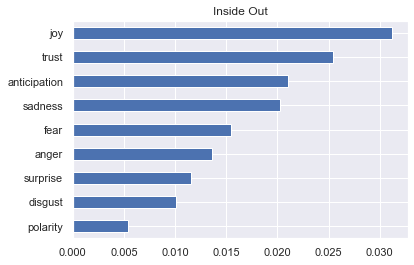

In [22]:
av=LIB.iloc[12]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


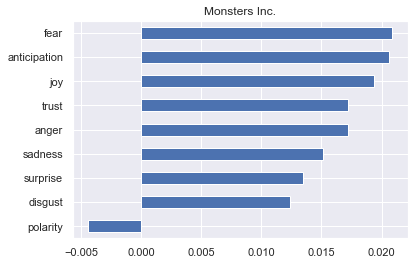

In [23]:
av=LIB.iloc[14]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


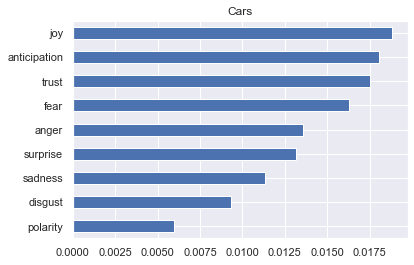

In [24]:
av=LIB.iloc[22]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


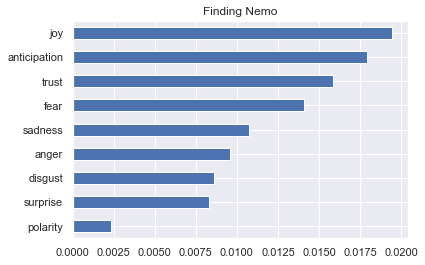

In [25]:
av=LIB.iloc[23]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

### Avengers Movies

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


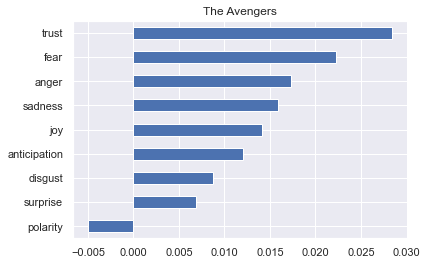

In [26]:
av=LIB.iloc[6]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


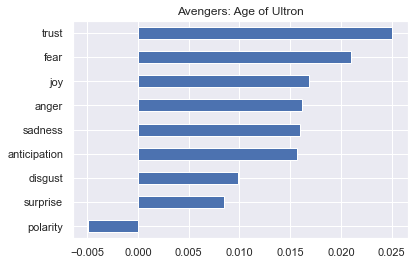

In [27]:
av2=LIB.iloc[7]
AV2=TOKENS.loc[(av2['name'],av2.name)]
AV2[emo_cols].mean().sort_values().plot.barh(title=av2['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


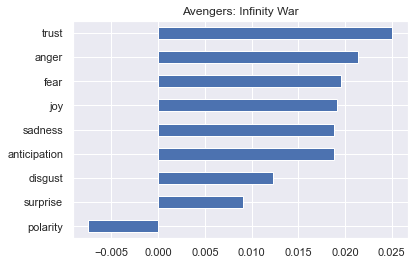

In [28]:
av3=LIB.iloc[8]
AV3=TOKENS.loc[(av3['name'],av3.name)]
AV3[emo_cols].mean().sort_values().plot.barh(title=av3['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


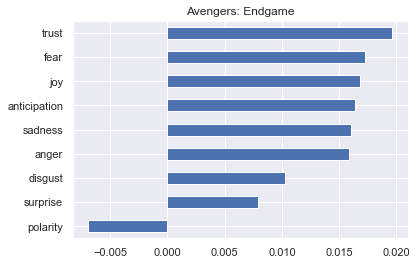

In [29]:
av4=LIB.iloc[9]
AV4=TOKENS.loc[(av4['name'],av4.name)]
AV4[emo_cols].mean().sort_values().plot.barh(title=av4['name'])

### Star wars

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


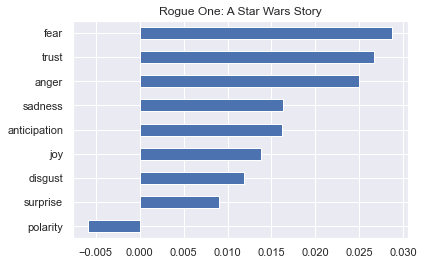

In [30]:
av=LIB.iloc[0]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


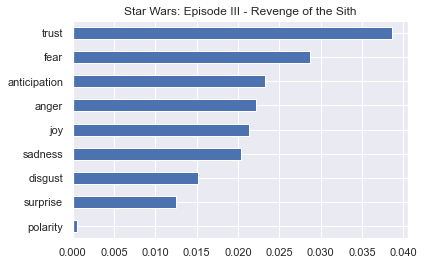

In [31]:
av=LIB.iloc[1]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


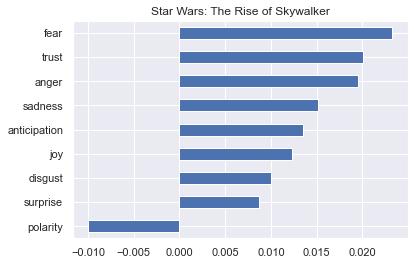

In [32]:
av=LIB.iloc[2]
AV=TOKENS.loc[(av['name'],av.name)]
AV[emo_cols].mean().sort_values().plot.barh(title=av['name'])

## Sentiment plots over time

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


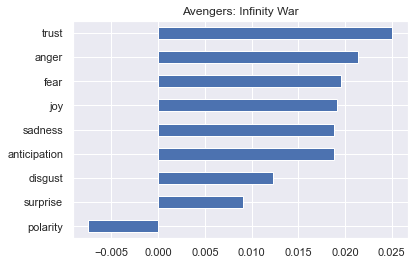

In [34]:
av3=LIB.iloc[8]
IW=TOKENS.loc[(av3['name'],av3.name)]
IW[emo_cols].mean().sort_values().plot.barh(title=av3['name'])

IW_action = IW.groupby(["Action_number"])[emo_cols].mean()

In [35]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

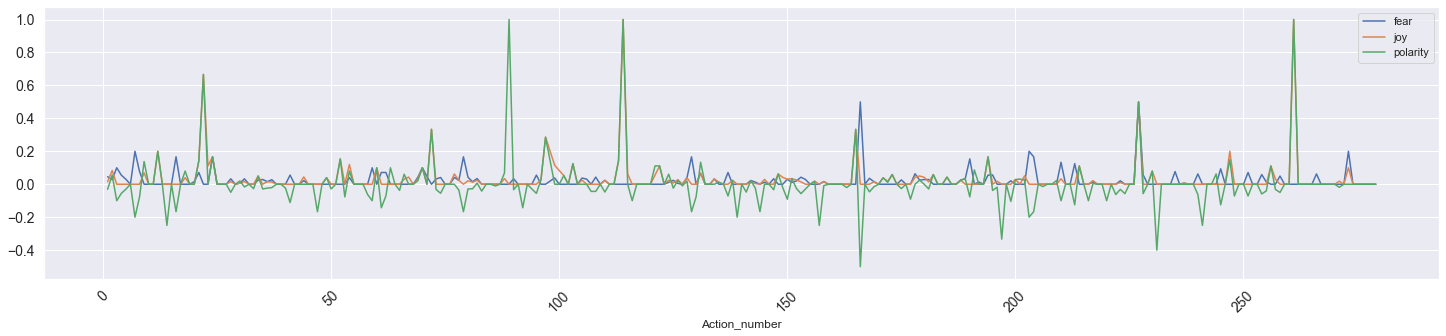

In [36]:
plot_sentiments(IW_action, ['fear','joy','polarity'])

In [38]:
endgame=TOKENS.loc[("Avengers: Endgame","m10")]
endgame

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


token_num         pos_tuple  pos  \
Action_number Dialogue_num sent_num                                     
0.0           0            0                 0   ('Okay,', 'RB')   RB   
                           0                 1     ('now', 'RB')   RB   
                           0                 2  ("let's", 'VBZ')  VBZ   
                           0                 3  ('worry', 'VBP')  VBP   
                           0                 4   ('about', 'IN')   IN   
...                                        ...               ...  ...   
359.0         3            1                 1      ('I', 'PRP')  PRP   
                           1                 2  ("don't", 'VBP')  VBP   
                           1                 3   ('think', 'VB')   VB   
                           1                 4      ('I', 'PRP')  PRP   
                           1                 5    ('will', 'MD')   MD   

                                    token_str term_str          studio  \
Action_number Dialogue_num sent_num                                      
0.0           0            0            Okay,     okay  Marvel Studios   
                           0              now      now  Marvel Studios   
                           0            let's     lets  Marvel Studios   
                           0            worry    worry  Marvel Studios   
                           0            about    about  Marvel Studios   
...                                       ...      ...             ...   
359.0         3            1                I        i  Marvel Studios   
                           1            don't     dont  Marvel Studios   
                           1            think    think  Marvel Studios   
                           1                I        i  Marvel Studios   
                           1             will     will  Marvel Studios   

                                                    director  \
Action_number Dialogue_num sent_num                            
0.0           0            0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
...                                                      ...   
359.0         3            1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   

                                                                genre  year  \
Action_number Dialogue_num sent_num                                           
0.0           0            0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
...                                                               ...   ...   
359.0         3            1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   

                                     anger  anticipation  disgust  fear  joy  \
Action_number Dialogue_num sent_num                                            
0.0           0            0           0.0           0.0      0.0   0.0  0.0   
                       

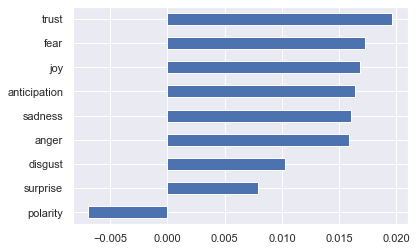

In [39]:
endgame[emo_cols].mean().sort_values().plot.barh()

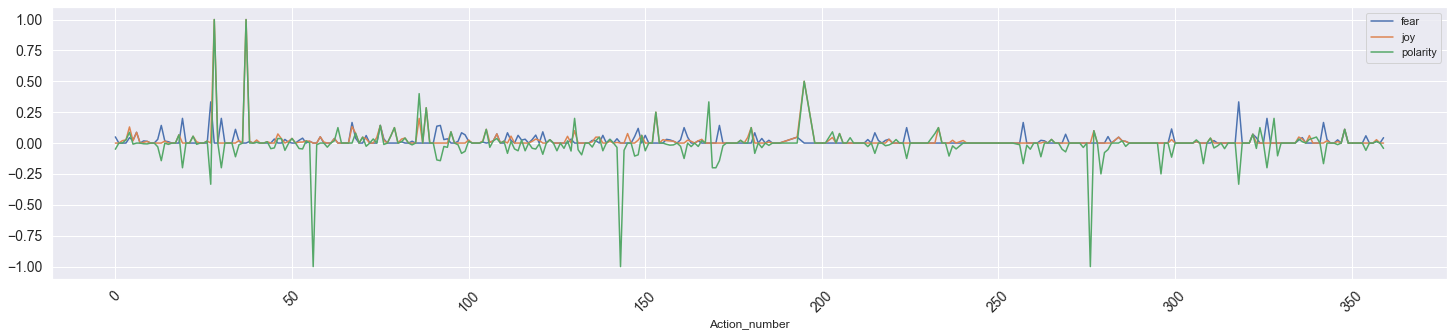

In [40]:
endgame_action = endgame.groupby(["Action_number"])[emo_cols].mean()
plot_sentiments(endgame_action, ['fear','joy','polarity'])

In [41]:
endgame

token_num         pos_tuple  pos  \
Action_number Dialogue_num sent_num                                     
0.0           0            0                 0   ('Okay,', 'RB')   RB   
                           0                 1     ('now', 'RB')   RB   
                           0                 2  ("let's", 'VBZ')  VBZ   
                           0                 3  ('worry', 'VBP')  VBP   
                           0                 4   ('about', 'IN')   IN   
...                                        ...               ...  ...   
359.0         3            1                 1      ('I', 'PRP')  PRP   
                           1                 2  ("don't", 'VBP')  VBP   
                           1                 3   ('think', 'VB')   VB   
                           1                 4      ('I', 'PRP')  PRP   
                           1                 5    ('will', 'MD')   MD   

                                    token_str term_str          studio  \
Action_number Dialogue_num sent_num                                      
0.0           0            0            Okay,     okay  Marvel Studios   
                           0              now      now  Marvel Studios   
                           0            let's     lets  Marvel Studios   
                           0            worry    worry  Marvel Studios   
                           0            about    about  Marvel Studios   
...                                       ...      ...             ...   
359.0         3            1                I        i  Marvel Studios   
                           1            don't     dont  Marvel Studios   
                           1            think    think  Marvel Studios   
                           1                I        i  Marvel Studios   
                           1             will     will  Marvel Studios   

                                                    director  \
Action_number Dialogue_num sent_num                            
0.0           0            0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
                           0         Anthony Russo Joe Russo   
...                                                      ...   
359.0         3            1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   
                           1         Anthony Russo Joe Russo   

                                                                genre  year  \
Action_number Dialogue_num sent_num                                           
0.0           0            0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
                           0         Adventure Science Fiction Action  2019   
...                                                               ...   ...   
359.0         3            1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   
                           1         Adventure Science Fiction Action  2019   

                                     anger  anticipation  disgust  fear  joy  \
Action_number Dialogue_num sent_num                                            
0.0           0            0           0.0           0.0      0.0   0.0  0.0   
                       

In [42]:
endgame['html'] =  endgame.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

C:\Users\Cory\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
endgame_diag = endgame.groupby(['Action_number','Dialogue_num'])[emo_cols].mean()

In [44]:
endgame_diag['diag_str'] = endgame.groupby(['Action_number','Dialogue_num']).term_str.apply(lambda x: x.str.cat(sep=' '))
endgame_diag['html_str'] = endgame.groupby(['Action_number','Dialogue_num']).html.apply(lambda x: x.str.cat(sep=' '))

In [45]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [46]:
sample_sentences(endgame_diag)

Sentiment,ID,Sentence
0.0,"(357.0, 0)",so did something go wrong or did something go right
0.0,"(285.0, 2)",where are the stones
0.0714,"(107.0, 4)",oh look its like a little puppy all happy and everything do you wanna go to space you wanna go to space puppy ill get you to space
0.0,"(40.0, 5)",in the hudson
-0.4,"(142.0, 10)",hand over the case stark
-0.2,"(91.0, 0)",お前はもう十分殺しただろ youre done hurting people
0.0,"(107.0, 1)",is that a person
-0.037,"(118.0, 1)",all right heres the deal tubby youre gonna charm her and im gonna poke her with this thing and extract the reality stone and get gone licketysplit
0.1667,"(340.0, 2)",im counting on it your majesty
0.0,"(348.0, 1)",its gonna be okay buck


In [47]:
sample_sentences(endgame_diag)

Sentiment,ID,Sentence
0.0,"(312.0, 4)",get it started well get the stones to you
-0.1429,"(92.0, 0)",死ね romanized shine nan english die nan
-0.1111,"(157.0, 9)",i have no idea maybe he made a mistake
0.0,"(26.0, 1)",what did you talk about
0.0,"(260.0, 0)",shes not coming back we have to make it worth it we have to
-0.0455,"(44.0, 0)",see the rules of the quantum realm arent like they are up here everything is unpredictable is that anybodys sandwich im starving
0.0,"(348.0, 1)",its gonna be okay buck
-0.2857,"(35.0, 3)",yeah and now we smell like garbage
0.0,"(263.0, 4)",look its not just the fact that that glove is channeling enough energy to light up a continent im telling you youre in no condition
0.0,"(104.0, 5)",which means we have to pick our targets


## Vader

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [49]:
analyzer.polarity_scores

<bound method SentimentIntensityAnalyzer.polarity_scores of <vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer object at 0x00000242AAD0F348>>

In [50]:
endgame_sents = endgame.groupby(OHCO[1:])[emo_cols].mean()
endgame_sents['sent_str'] = endgame.groupby(OHCO[1:]).term_str.apply(lambda x: x.str.cat(sep=' '))

In [51]:
endgame_vader_cols = endgame_sents.sent_str.apply(analyzer.polarity_scores).apply(lambda x: pd.Series(x))
endgame_vader = pd.concat([endgame_sents, endgame_vader_cols], axis=1)

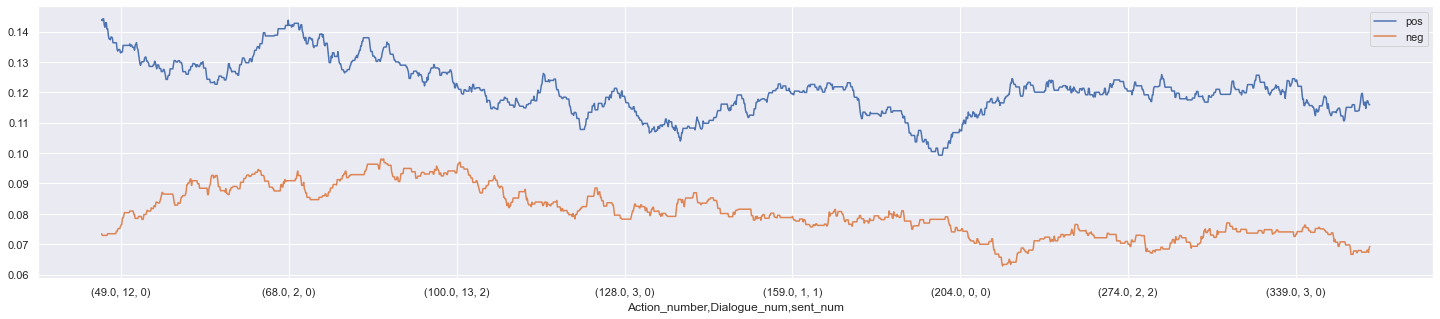

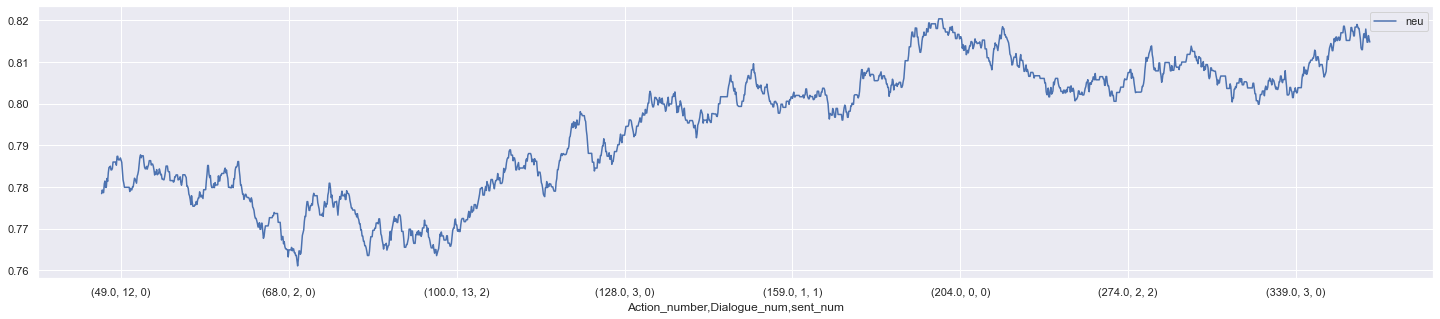

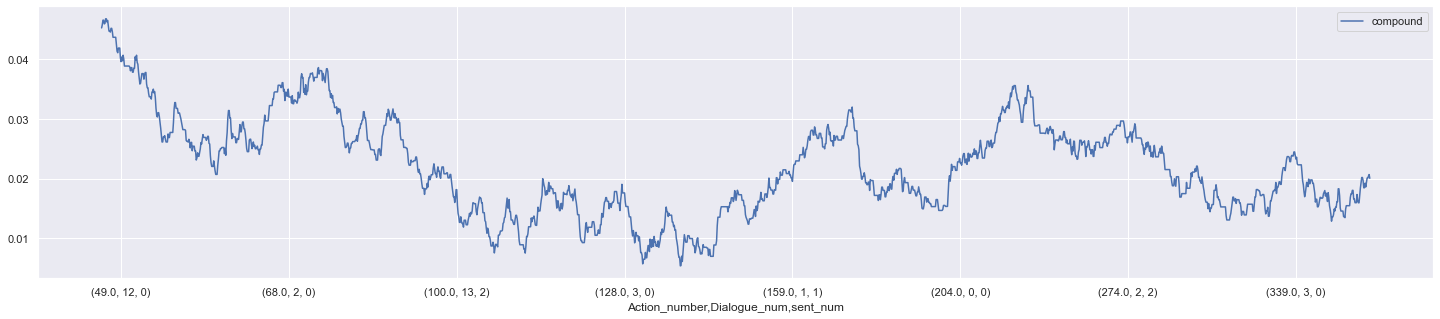

In [52]:
w = int(endgame_vader.shape[0] / 5)
endgame_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
endgame_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
endgame_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [53]:
endgame_vader.loc[(128.0,0,0)]

anger                       0
anticipation                0
disgust                     0
fear                        0
joy                         0
sadness                     0
surprise                    0
trust                       0
polarity                    0
sent_str        youre welcome
neg                         0
neu                      0.25
pos                      0.75
compound               0.4588
Name: (128.0, 0, 0), dtype: object

## Exports

In [55]:
TOKENS.to_csv(f"{data_out}{data_prefix}-TOKENS-sentiment.csv")

In [56]:
EMO_MOVIES.to_csv(f"{data_out}{data_prefix}-LIB-sentiment.csv")